Load the IRIS dataset
Make the exploration data analysis (Missing val analysis, Target var class distribution)
Make pre-processing (Ex: Handle Missing val)
Apply shallow NN(Tune the no of epochs)
Finalize the model
    B. Use Perceptron model for the same dataset and compare your results

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Map target to class names
data['target'] = data['target'].map(dict(zip(range(3), iris.target_names)))

# View data
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [2]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


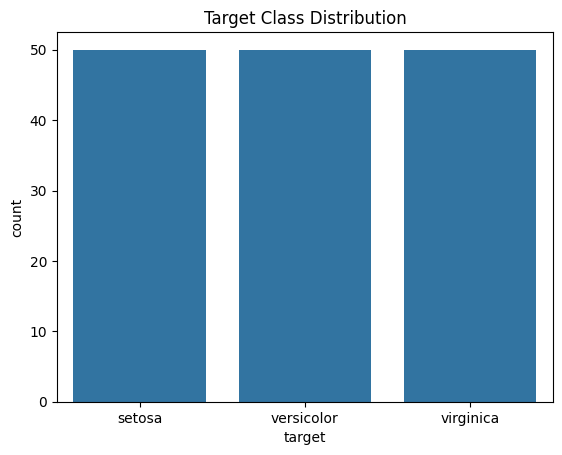

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=data)
plt.title("Target Class Distribution")
plt.show()

In [4]:
# Fill missing values if any
data.fillna(data.mean(numeric_only=True), inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['target_encoded'] = le.fit_transform(data['target'])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Features and labels
X = data[iris.feature_names]
y = to_categorical(data['target_encoded'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build shallow NN
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train with tuned epochs
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, verbose=0)

# Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Shallow NN Accuracy: {acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Shallow NN Accuracy: 0.8333


In [7]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Use original encoded target
X = data[iris.feature_names]
y = data['target_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train perceptron
clf = Perceptron(max_iter=1000, eta0=0.01, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
acc_perceptron = accuracy_score(y_test, y_pred)
print(f"Perceptron Accuracy: {acc_perceptron:.4f}")

Perceptron Accuracy: 0.9333
